<a href="https://colab.research.google.com/github/guimasuko/project/blob/main/Aula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%pip install yfinance --upgrade --no-cache-dir
%pip install investpy


Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import investpy as inv

In [4]:
import time
import datetime

### Taxa de juros Brasil (Selic)

Códigos para obtenção de dados do bc:

https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

In [5]:
# função que retorna dados do banco central através de códigos
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

In [6]:
# código da meta da taxa de juros brasileira (selic)
selic = consulta_bc(432)

In [7]:
selic.rename(columns={'valor': 'Selic'}, inplace=True)
selic.head()

,Selic
data,
1999-03-05,45.0
1999-03-06,45.0
1999-03-07,45.0
1999-03-08,45.0
1999-03-09,45.0


In [8]:
selic.to_csv('data/selic.csv')

### Dólar e Ibovespa

In [9]:
tickers = "^BVSP USDBRL=X"
dollar_ibov = yf.download(tickers, start="2007-01-01")["Close"]

[*********************100%***********************]  2 of 2 completed


In [10]:
dollar_ibov.rename(columns={'USDBRL=X': 'Dollar', '^BVSP': 'Ibovespa'}, inplace=True)

In [11]:
dollar_ibov.head()

,Dollar,Ibovespa
Date,,
2007-01-01,2.1325,NaN
2007-01-02,2.1310,45383.0
2007-01-03,2.1345,44445.0
2007-01-04,2.1390,44020.0
2007-01-05,2.1470,42245.0


In [12]:
dollar_ibov.to_csv('data/dollar_ibov.csv')

### Unindo os dois dataframes.

In [13]:
df = pd.merge(dollar_ibov, selic, left_index=True, right_index=True)
df

,Dollar,Ibovespa,Selic
2007-01-01,2.132500,NaN,13.25
2007-01-02,2.131000,45383.000000,13.25
2007-01-03,2.134500,44445.000000,13.25
2007-01-04,2.139000,44020.000000,13.25
2007-01-05,2.147000,42245.000000,13.25
...,...,...,...
2022-02-14,5.249956,113807.000000,10.75
2022-02-15,5.214000,114660.000000,10.75
2022-02-16,5.157900,115181.000000,10.75
2022-02-17,5.135800,113528.000000,10.75


In [14]:
df.to_csv('data/dollar_ibov_selic.csv')

### Tarefa 02

In [15]:
import seaborn as sns

<AxesSubplot:title={'center':'Série da Taxa Selic 2007-2022'}, ylabel='Porcentagem'>

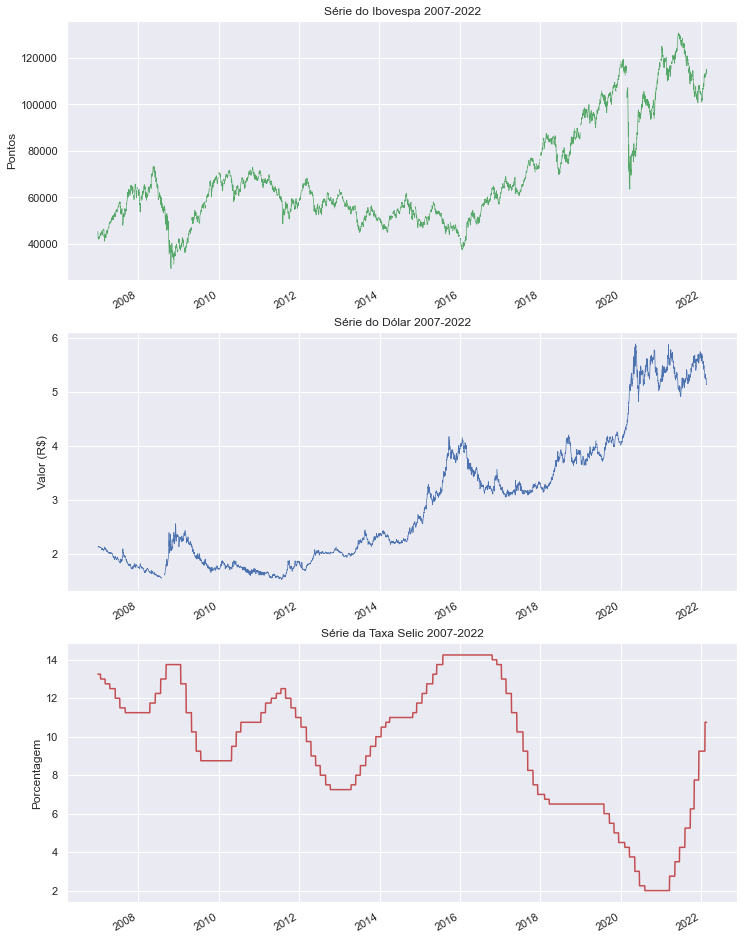

In [16]:
sns.set()
fig, axes = plt.subplots(3,1,figsize=(12,18))

df['Ibovespa'].plot(ax=axes[0], ylabel='Pontos', title='Série do Ibovespa 2007-2022', linewidth=.7, color='g')
df['Dollar'].plot(ax=axes[1], ylabel='Valor (R$)', title='Série do Dólar 2007-2022', linewidth=.7, color='b')
df['Selic'].plot(ax=axes[2], ylabel='Porcentagem', title='Série da Taxa Selic 2007-2022', color='r')

In [17]:
df['Dollar'].mean(skipna=True)

2.950116329526755

In [18]:
df1 = df.groupby(df.index.year).mean()
df1['Dollar'] = round(df1['Dollar'], 2)
df1['Ibovespa'] = round(df1['Ibovespa'],0).astype(int)
df1['Selic'] = round(df1['Selic'], 2)
df1

,Dollar,Ibovespa,Selic
2007,1.95,53114,12.05
2008,1.84,55261,12.45
2009,1.99,52751,10.15
2010,1.75,67258,9.91
2011,1.67,61207,11.76
2012,1.95,59579,8.63
2013,2.15,53670,8.29
2014,2.35,52730,10.96
2015,3.33,49780,13.47
2016,3.48,53258,14.18


<AxesSubplot:title={'center':'Média da Taxa Selic por ano 2007-2022'}, xlabel='Data', ylabel='Porcentagem'>

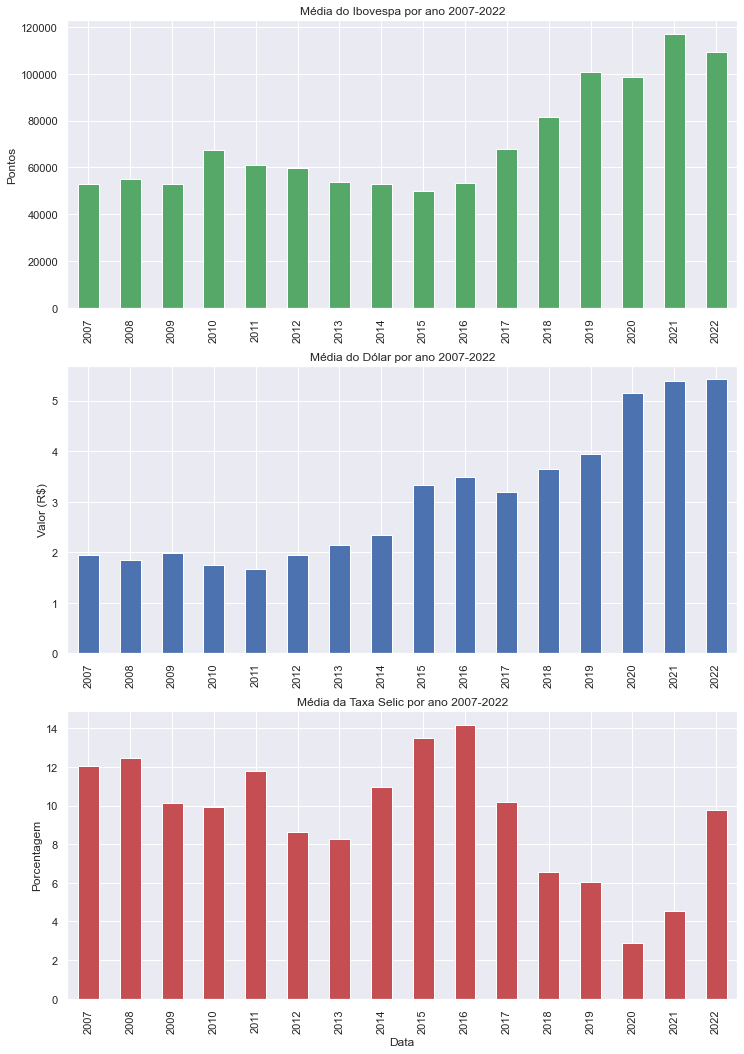

In [19]:
sns.set()
fig, axes = plt.subplots(3,1,figsize=(12,18))

df1['Ibovespa'].plot(ax=axes[0], kind='bar', ylabel="Pontos", title="Média do Ibovespa por ano 2007-2022", color='g')
df1['Dollar'].plot(ax=axes[1], kind='bar', ylabel="Valor (R$)", title="Média do Dólar por ano 2007-2022", color='b')
df1['Selic'].plot(ax=axes[2], kind='bar', xlabel="Data", ylabel="Porcentagem", title="Média da Taxa Selic por ano 2007-2022", color='r')

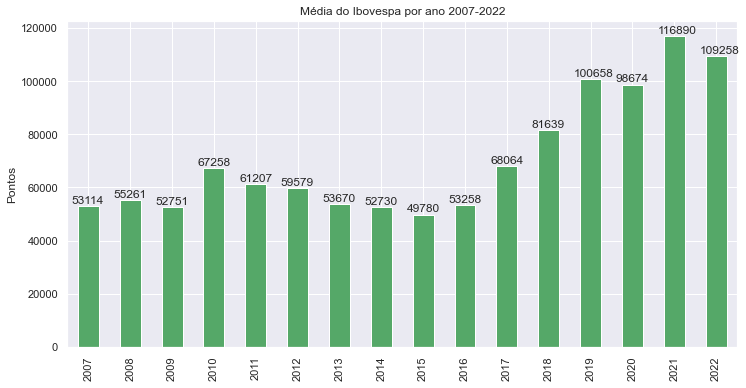

In [20]:
df1['Ibovespa'].plot(kind='bar', ylabel="Pontos", title="Média do Ibovespa por ano 2007-2022", color='g', figsize=(12,6))

y = df1['Ibovespa'].to_list()

for index, value in enumerate(y):
    plt.text(index - 0.4, value + 1000, str(value))

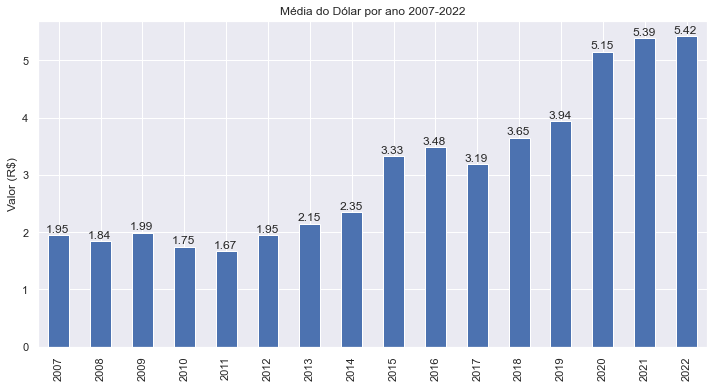

In [21]:
df1['Dollar'].plot(kind='bar', ylabel="Valor (R$)", title="Média do Dólar por ano 2007-2022", color='b', figsize=(12,6))

y = df1['Dollar'].to_list()

for index, value in enumerate(y):
    plt.text(index - 0.3, value + 0.05, str(value))

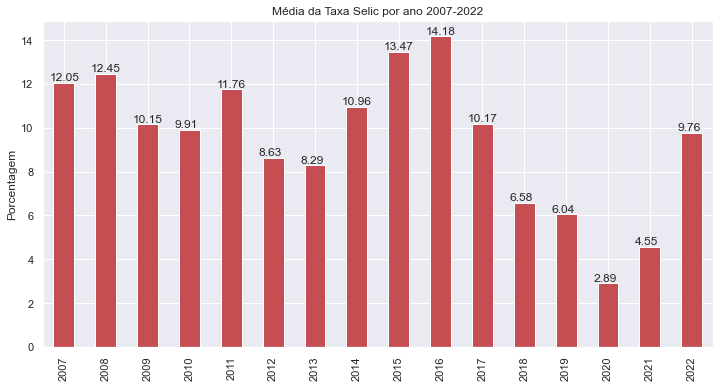

In [22]:
df1['Selic'].plot(kind='bar', ylabel="Porcentagem", title="Média da Taxa Selic por ano 2007-2022", color='r', figsize=(12,6))

y = df1['Selic'].to_list()

for index, value in enumerate(y):
    plt.text(index - 0.35, value + 0.1, str(value))

### Tarefa 03

In [23]:
# função cujo o atributo é o ano de interesse da liga nba
def nba(year):
    str = 'https://www.basketball-reference.com/leagues/NBA_{}_standings.html'
    url = str.format(year)
    return url

In [54]:
# interessse na liga do ano de 2022
url = nba(2022)
nba_2022 = pd.read_html(url, header=0)

In [55]:
# os índices [0] e [1] representam as conferências leste e oeste, respesctivamente
east_conf = nba_2022[0]
west_conf = nba_2022[1]

In [56]:
# renomeia as colunas Western Conference e Eastern Conference para Team
west_conf = west_conf.rename(columns={'Western Conference': 'Team'})
east_conf = east_conf.rename(columns={'Eastern Conference': 'Team'})

In [57]:
# separa a coluna Team em duas, lado esquerdo de "(" que referencia o time e lado direito de ")" que referencia a posição
west_conf[['Team', '# Conf']] = west_conf['Team'].str.split('(', expand=True)
east_conf[['Team', '# Conf']] = east_conf['Team'].str.split('(', expand=True)

In [58]:
# retira o último caracter da coluna #
west_conf['# Conf'] = west_conf['# Conf'].str[:-1]
east_conf['# Conf'] = east_conf['# Conf'].str[:-1]

In [62]:
# adiciona coluna sobre qual conferência o time pertence
west_conf['Conf'] = 'West'
east_conf['Conf'] = 'East'

In [64]:
# unindo os dois dataframes
geral = pd.concat([west_conf, east_conf])

In [66]:
# ordenando os times em ordem decrescente pela razão vitória/derrota
geral.sort_values(by=['W/L%'], ascending=False, inplace=True)

In [96]:
# arredondando para duas casas decimais
geral['W/L%'] = round(geral['W/L%'], 2)

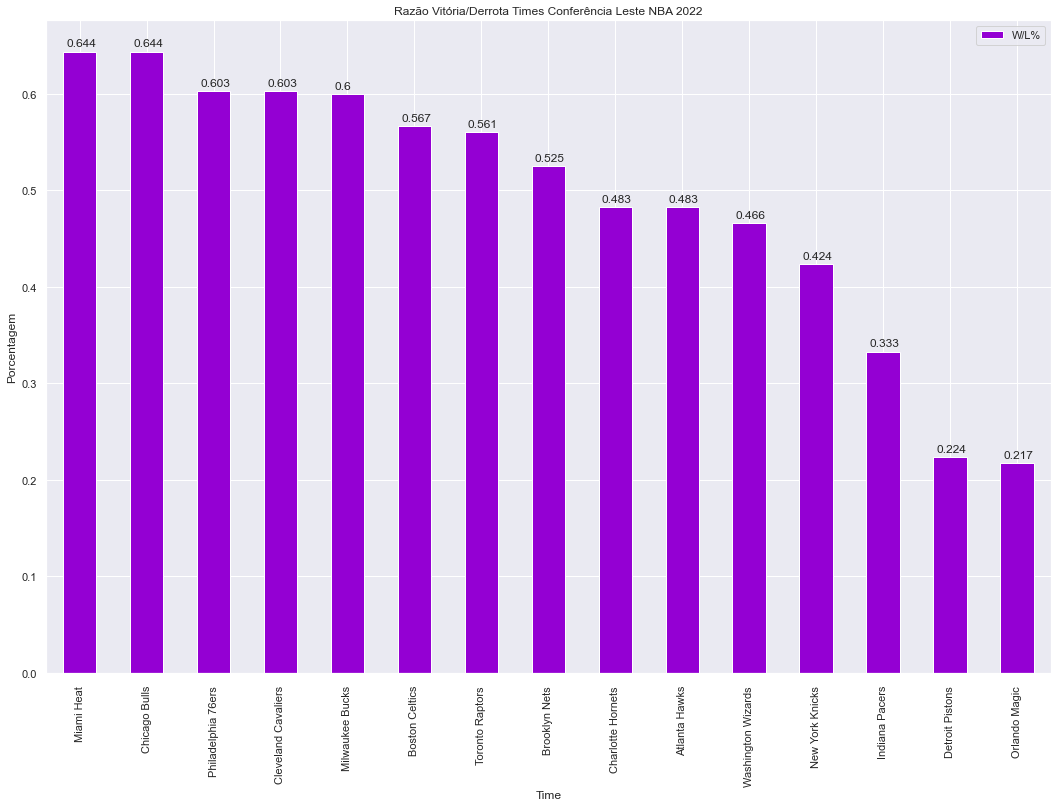

In [117]:
east_conf.plot(
    x = 'Team',
    y = 'W/L%', 
    kind='bar', 
    xlabel='Time', 
    ylabel="Porcentagem", 
    title="Razão Vitória/Derrota Times Conferência Leste NBA 2022", 
    color='darkviolet', 
    figsize=(18,12)
    )

y = east_conf['W/L%'].to_list()

for index, value in enumerate(y):
    plt.text(index - 0.20, value + 0.005, str(value))

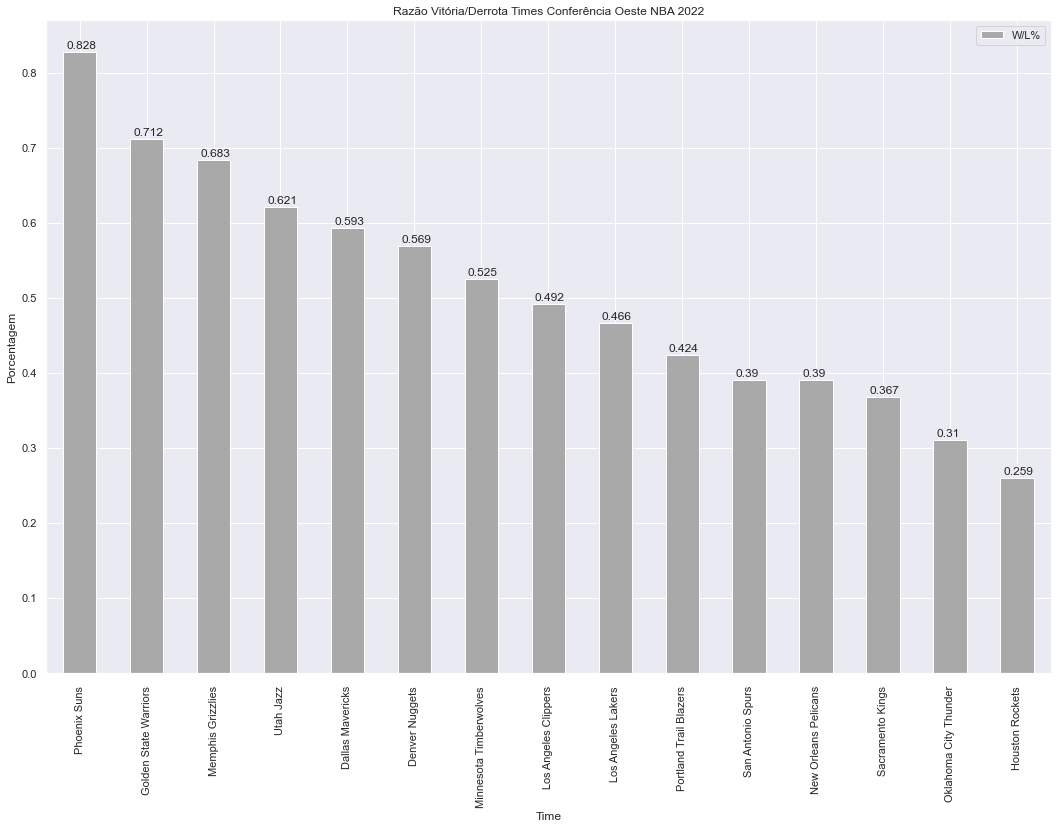

In [118]:
west_conf.plot(
    x = 'Team',
    y = 'W/L%', 
    kind='bar', 
    xlabel='Time', 
    ylabel="Porcentagem", 
    title="Razão Vitória/Derrota Times Conferência Oeste NBA 2022", 
    color='darkgrey', 
    figsize=(18,12)
    )

y = west_conf['W/L%'].to_list()

for index, value in enumerate(y):
    plt.text(index - 0.20, value + 0.005, str(value))

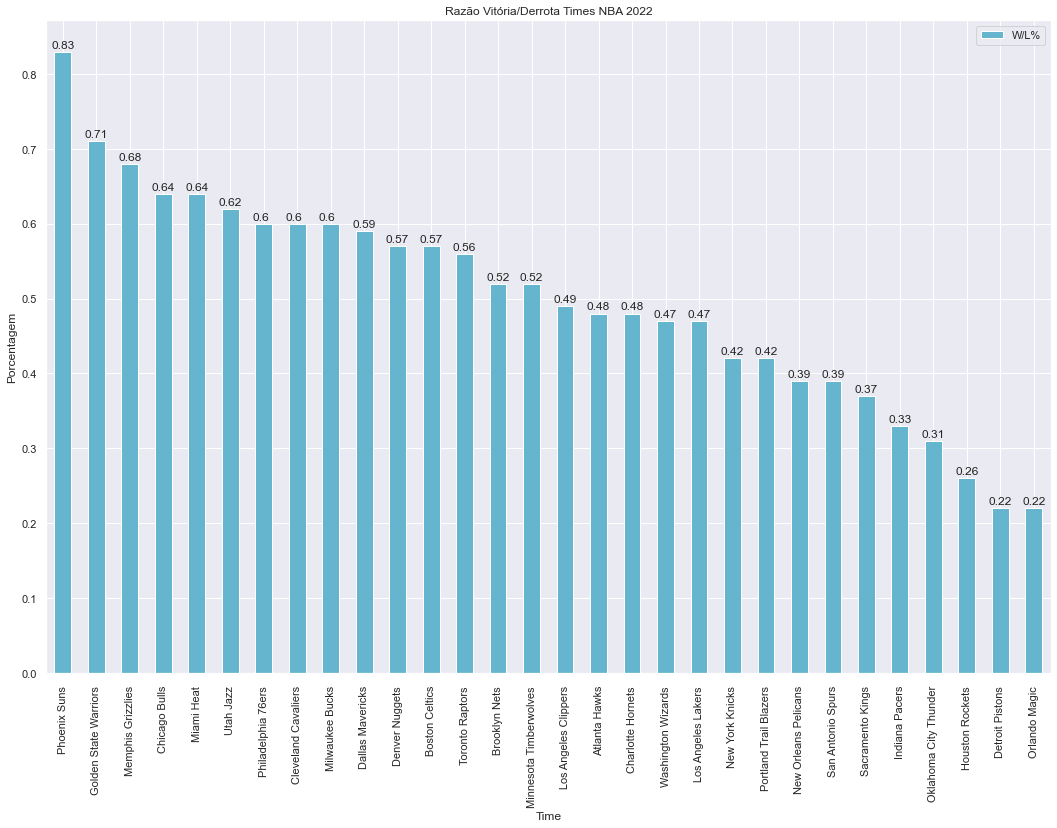

In [121]:
geral.plot(
    x = 'Team', 
    y = 'W/L%', 
    kind='bar', 
    xlabel='Time', 
    ylabel="Porcentagem", 
    title="Razão Vitória/Derrota Times NBA 2022", 
    color='c', 
    figsize=(18,12)
    )

y = geral['W/L%'].to_list()

for index, value in enumerate(y):
    plt.text(index - 0.35, value + 0.005, str(value))